In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer
# import pickle
# import os
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# # Load dataset

# tickers_input = "ADBE"
# df = pd.read_csv(f"/Users/simonebucciol/Desktop/project/csv/{tickers_input}_with_indicators.csv")

# # Drop non-numeric columns
# if 'date' in df.columns:
#     df.drop(columns=['date'], inplace=True)

# # Import the target variable
# from target import y  # Ensure this is properly aligned with df

# # Ensure the index of y matches df before proceeding
# y = y.replace([np.inf, -np.inf], np.nan).dropna()
# y = y.astype(int)  # Ensure it's integer-based

# # Ensure `X` and `y` have the same index
# X = df.loc[y.index]  # Align X with y

# # Replace infinities with NaN
# X.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Handle missing values in X using mean imputation
# imputer = SimpleImputer(strategy='mean')
# X = pd.DataFrame(imputer.fit_transform(X), columns=df.columns, index=y.index)

# # Verify final shapes before splitting
# print(f"Final X shape: {X.shape}, Final y shape: {y.shape}")

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Train the Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Save the model
# model_file_path = '/Users/simonebucciol/Desktop/project/machine_learning/file_brain/rf_model.pkl'
# with open(model_file_path, "wb") as file:
#     pickle.dump(rf_model, file)

# # Make predictions
# y_pred = rf_model.predict(X_test)
# print(f"The predictions for this ticker are: {y_pred}")

# # Model Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy * 100:.4f}%")

# # Classification Report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # ROC Curve and AUC
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# print(f"ROC AUC: {roc_auc:.4f}")

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred)
# plt.figure()
# plt.plot(recall, precision, color='blue', lw=2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

# # Feature Importance
# importances = rf_model.feature_importances_
# feature_names = X.columns
# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# print(feature_importances.sort_values(by='Importance', ascending=False))

# # Visualize Feature Importance
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importances['Feature'], feature_importances['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.show()

# # Error Analysis
# errors = y_test != y_pred
# error_analysis = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': errors})
# print(error_analysis[error_analysis['Error'] == True])

# # Creiamo DataFrame per allineare le date e visualizzare le posizioni
# df_train = pd.DataFrame({'Position': y_train}, index=X_train.index)
# df_test = pd.DataFrame({'Real Position': y_test, 'Predicted Position': y_pred}, index=X_test.index)

# # Ordiniamo i dati per data
# df_train = df_train.sort_index()
# df_test = df_test.sort_index()

# # Creazione della figura con due subplots
# fig, ax1 = plt.subplots(figsize=(12, 7))

# # --- Grafico del Prezzo di Chiusura ---
# ax1.plot(df['close'], label="Close Price", color='blue')

# # --- Segnali Reali ---
# # Posizioni Long reali (se Position == 1)
# ax1.plot(df_test.index[df_test['Real Position'] == 1], df['close'].loc[df_test.index[df_test['Real Position'] == 1]], 
#          marker="o", linestyle="", color="green", label="Real Long (Buy)", markersize=8)
# # Posizioni Short reali (se Position == 0)
# ax1.plot(df_test.index[df_test['Real Position'] == 0], df['close'].loc[df_test.index[df_test['Real Position'] == 0]], 
#          marker="o", linestyle="", color="red", label="Real Short (Sell)", markersize=8)

# # --- Segnali Predetti ---
# # Posizioni Long predetti (se Predicted Position == 1)
# ax1.plot(df_test.index[df_test['Predicted Position'] == 1], df['close'].loc[df_test.index[df_test['Predicted Position'] == 1]], 
#          marker="x", linestyle="", color="orange", label="Predicted Long (Buy)", markersize=8)
# # Posizioni Short predetti (se Predicted Position == 0)
# ax1.plot(df_test.index[df_test['Predicted Position'] == 0], df['close'].loc[df_test.index[df_test['Predicted Position'] == 0]], 
#          marker="x", linestyle="", color="purple", label="Predicted Short (Sell)", markersize=8)

# # --- Grafico delle Posizioni Real vs Predette ---
# # Creiamo un altro grafico che mostra le posizioni Real e Predette
# ax2 = ax1.twinx()  # Crea un secondo asse y condiviso
# ax2.step(df_test.index, df_test['Real Position'], label="Real Position", color="green", linestyle='--', alpha=0.7, linewidth=2)
# ax2.step(df_test.index, df_test['Predicted Position'], label="Predicted Position", color="orange", linestyle='--', alpha=0.7, linewidth=2)

# # Aggiunta di etichette, legenda e titolo
# ax1.set_title("Close Price with Real and Predicted Buy/Sell Signals")
# ax1.set_ylabel("Price")
# ax1.set_xlabel("Date")
# ax1.legend(loc="upper left")

# ax2.set_ylabel("Position (0 = Short, 1 = Long)")
# ax2.legend(loc="upper right")

# plt.xticks(rotation=45)  # Ruota le date per migliore leggibilità
# plt.tight_layout()  # Ottimizza la disposizione
# plt.show()

In [ ]:
# # # Step 1: Load the data
# data = df
# #data = file_path #, delimiter=';')

# # # Step 2: Calculate daily returns (percentage change in 'Close' price)
# data['Daily Return'] = data['close'].pct_change().fillna(0)
# y_pred = df_test['Predicted Position']
# print(y_pred)
# type(y_pred)

In [ ]:
# # data_subset = pd.DataFrame(data.iloc[25:2006])  # Prende tutte le righe dalla 25 in poi
# # print(data_subset['Daily Return'])
# # type(data_subset['Daily Return'])

# # Creiamo una colonna vuota per la posizione finale
# data['Predicted Position'] = np.nan  # Inizialmente mettiamo NaN

# # Inseriamo le posizioni predette nei loro punti originali
# data.loc[y_pred.index, 'Predicted Position'] = y_pred  # Copiamo i segnali predetti

# # Propaghiamo in avanti il segnale per riempire i NaN con l'ultima posizione nota
# data['Predicted Position'].fillna(method='ffill', inplace=True)

# # Ora possiamo calcolare i rendimenti della strategia
# data['Strategy Return'] = data['Daily Return'] * data['Predicted Position'].apply(lambda x: 1 if x == 1 else -1)

# # convert the first 26 value of the 'Strategy Return' column to 0
# data['Strategy Return'].iloc[:26] = 0



# # Controlliamo i risultati
# print(data[['Daily Return', 'Predicted Position', 'Strategy Return']])

In [ ]:
# # calculate the strategy return with the predicted position with the simulation that i reivest the gain of the day in the next day starting to the 26th day
# # # Step 3: Calculate the strategy return
# data['Strategy Return'] = data['Daily Return'] * data['Predicted Position'].shift(1).fillna(0)
# data['Strategy Return'].iloc[:26] = 0
# print(data[['Daily Return', 'Predicted Position', 'Strategy Return']])

# # # Step 4: Calculate cumulative returns
# data['Cumulative Market Return'] = (data['Daily Return'] + 1).cumprod()
# print(data[['Strategy Return', 'Cumulative Market Return']])

# # # Step 5: Plot the cumulative returns
# # plt.figure(figsize=(12, 7))
# # plt.plot(data['Cumulative Market Return'], label='Market Returns', color='b', linestyle='-', linewidth=2)
# # plt.plot(data['Cumulative Strategy Return'], label='Strategy Returns', color='r', linestyle='--', linewidth=2)
# # plt.title('Cumulative Market vs Strategy Returns')
# # plt.legend()
# # plt.show()



Column names in dataset: Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adl', 'atr',
       'middle_band_bll', 'upper_band_bll', 'lower_band_bll', 'cmf', 'co',
       'cmo', 'cci', 'dpo', '+di', '-di', 'dx', 'adx', 'adxr', 'dema', 'emv',
       'emv_ma', 'upper_band_env', 'lower_band_env', 'rl_0.0', 'rl_23.6',
       'rl_38.2', 'rl_50.0', 'rl_61.8', 'rl_100.0', 'fosc', 'tenkan_sen',
       'kijun_sen', 'senkou_a', 'senkou_b', 'imi', 'ko', 'lri', 'lrs', 'mfi',
       'mi', 'mp', 'mom', 'ma-simple', 'ma-exponential', 'ma-time_series',
       'ma-triangular', 'ma-variable', 'macd', 'signal_line', 'nvi', 'obv',
       'sar', 'prf', 'target_LONG', 'pvi', 'pvt', 'highest_high', 'lowest_low',
       'posc', 'prc', 'upper_band', 'lower_band', 'posc.1', 'trigger_line',
       'qstick', 'ri', 'rmi', 'rsi', 'rvi', 'sd', 'smi', '%K', '%D', '%K.1',
       '%D.1', 'swi', 'tsf', 'tema', 'tp', 'uosc', 'vhf', 'vch', 'vosc', 'vrc',
       'wc', 'ws', 'wad', 'wr'],
      dtype='object')
      

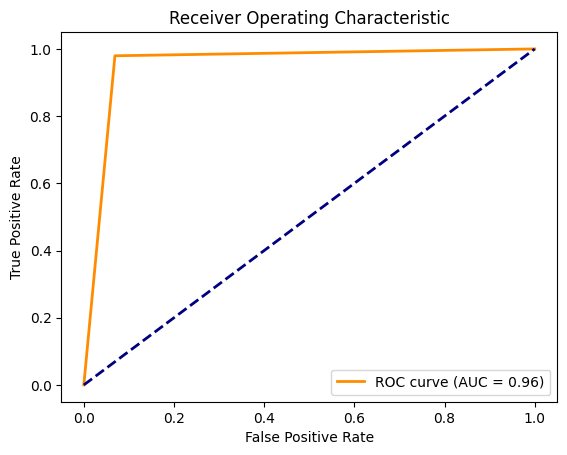

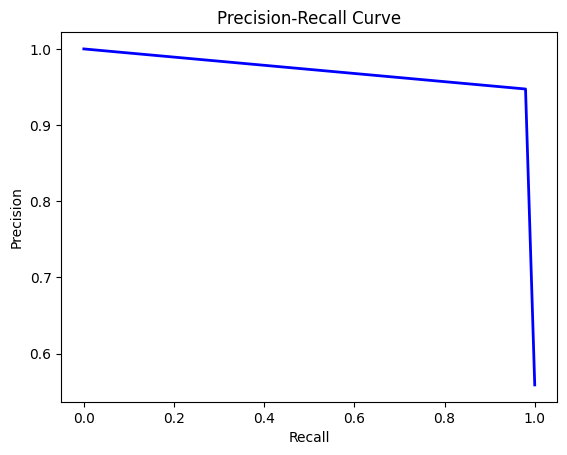

        Feature  Importance
56          pvi    0.061304
19         adxr    0.041590
18          adx    0.035403
57          pvt    0.025869
48  ma-variable    0.025077
..          ...         ...
26      rl_23.6    0.000000
40          mfi    0.000000
27      rl_38.2    0.000000
28      rl_50.0    0.000000
29      rl_61.8    0.000000

[90 rows x 2 columns]


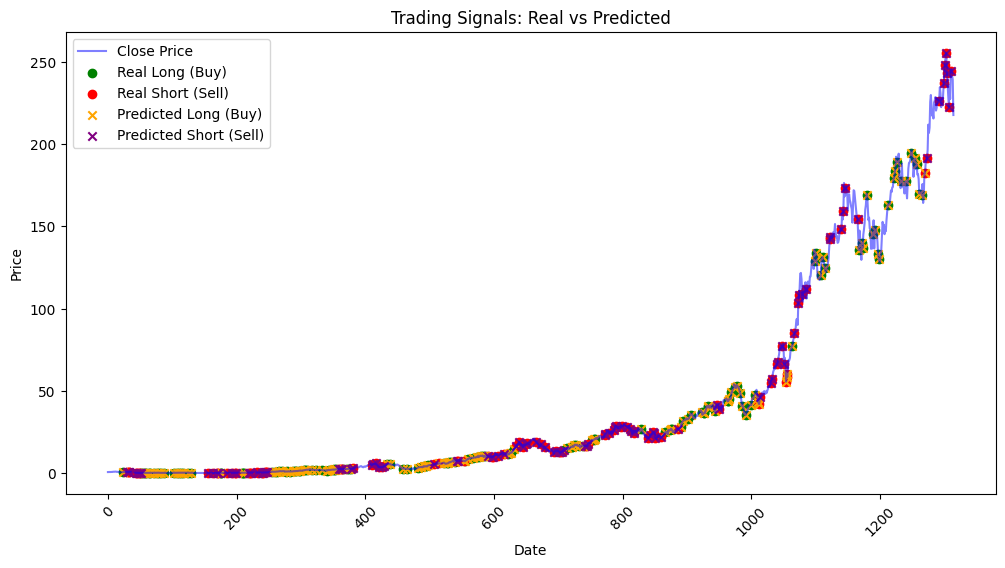

      Daily Return  Predicted Position  Strategy Return
0         0.000000                 0.0        -0.000000
1         0.009421                 0.0        -0.009421
2         0.108277                 0.0        -0.108277
3        -0.087030                 0.0         0.087030
4         0.062731                 0.0        -0.062731
...            ...                 ...              ...
1310      0.074551                 0.0        -0.074551
1311      0.004988                 0.0        -0.004988
1312     -0.015109                 0.0         0.015109
1313     -0.011454                 0.0         0.011454
1314     -0.089681                 0.0         0.089681

[1315 rows x 3 columns]
      Daily Return  Predicted Position  Strategy Return
0         0.000000                 0.0         0.000000
1         0.009421                 0.0         0.000000
2         0.108277                 0.0         0.000000
3        -0.087030                 0.0         0.000000
4         0.062731     

/var/folders/02/7b06dnvd2svgpfd922f5mv700000gn/T/ipykernel_81204/2330757143.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted Position'].iloc[0] = 0  # Prima posizione neutrale
/var/folders/02/7b06dnvd2svgpfd922f5mv700000gn/T/ipykernel_81204/2330757143.py:139: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Predicted Position'].fillna(method='ffill', inplace=True)  # Propagazione segnale
/var/folders/02/7b06dnvd2svgpfd922f5mv700000gn/T/ipykernel_81204/2330757143.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

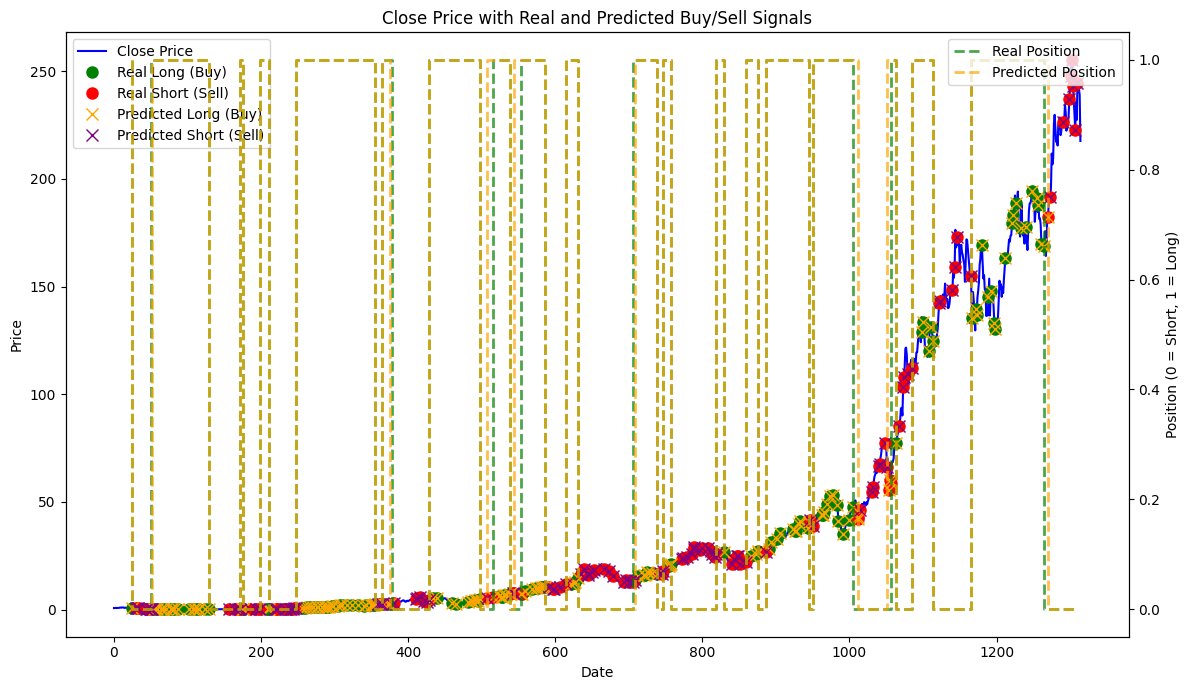

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# --- Caricamento dati ---
tickers_input = "AAPL"
df = pd.read_csv(f"/Users/simonebucciol/Desktop/project/csv/{tickers_input}_with_indicators.csv")

############################################
# --- Pre-elaborazione dati e pulizia ---
# Controlliamo i nomi delle colonne per assicurarci che "date" esista
print("Column names in dataset:", df.columns)

# Se "date" non è presente, proviamo a identificare il nome corretto
date_col_candidates = [col for col in df.columns if "date" in col.lower()]
if date_col_candidates:
    df.rename(columns={date_col_candidates[0]: "date"}, inplace=True)  # Rinomina la colonna trovata
else:
    raise KeyError("Nessuna colonna contenente 'date' trovata nel file CSV!")

# Converti la colonna in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtra i dati a partire dal 01-01-2000
df = df[df['date'] >= '2000-01-01'].reset_index(drop=True)

# Verifica la corretta conversione
print(df.head())
print(df.dtypes)


###################################################################################




# Rimozione della colonna 'date' se presente
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)

# Import del target (deve essere già pre-elaborato)
from target import y

# Pulizia dati target
y = y.replace([np.inf, -np.inf], np.nan).dropna().astype(int)

# Allineamento indici tra X e y
valid_idx = y.index.intersection(df.index)  # Indici comuni
X = df.loc[valid_idx].copy()
y = y.loc[valid_idx]

# Sostituzione valori infiniti e gestione dei NaN in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=df.columns, index=y.index)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Addestramento modello Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Salvataggio modello
model_file_path = '/Users/simonebucciol/Desktop/project/machine_learning/file_brain/rf_model.pkl'
with open(model_file_path, "wb") as file:
    pickle.dump(rf_model, file)

# --- Predizioni e valutazione ---
y_pred = rf_model.predict(X_test)
print(f"Accuratezza: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# --- Importanza delle feature ---
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# --- Visualizzazione Segnali Trading ---
df_test = pd.DataFrame({'Real Position': y_test, 'Predicted Position': y_pred}, index=X_test.index).sort_index()
plt.figure(figsize=(12, 6))

# Prezzo chiusura
plt.plot(df['close'], label="Close Price", color='blue', alpha=0.5)

# Segnali reali
plt.scatter(df_test.index[df_test['Real Position'] == 1], df['close'].loc[df_test.index[df_test['Real Position'] == 1]], 
            color="green", marker="o", label="Real Long (Buy)")
plt.scatter(df_test.index[df_test['Real Position'] == 0], df['close'].loc[df_test.index[df_test['Real Position'] == 0]], 
            color="red", marker="o", label="Real Short (Sell)")

# Segnali predetti
plt.scatter(df_test.index[df_test['Predicted Position'] == 1], df['close'].loc[df_test.index[df_test['Predicted Position'] == 1]], 
            color="orange", marker="x", label="Predicted Long (Buy)")
plt.scatter(df_test.index[df_test['Predicted Position'] == 0], df['close'].loc[df_test.index[df_test['Predicted Position'] == 0]], 
            color="purple", marker="x", label="Predicted Short (Sell)")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Trading Signals: Real vs Predicted")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# --- Simulazione strategia trading ---
df['Daily Return'] = df['close'].pct_change().fillna(0)

# Creiamo la colonna 'Predicted Position' e la propaghiamo in avanti
df['Predicted Position'] = np.nan
df.loc[df_test.index, 'Predicted Position'] = df_test['Predicted Position']
df['Predicted Position'].iloc[0] = 0  # Prima posizione neutrale
df['Predicted Position'].fillna(method='ffill', inplace=True)  # Propagazione segnale

# Calcolo del ritorno della strategia (shift per evitare look-ahead bias) facendo attenzione a vendite allo scoperto e acquisti, calcolando i rendimenti che quando è vendita allo scoprto e il prezzo scende per noi è un profitto e non una perdita

df['Strategy Return'] = df['Daily Return'] * df['Predicted Position'].apply(lambda x: 1 if x == 1 else -1) #.shift(1).fillna(0)
print(df[['Daily Return', 'Predicted Position', 'Strategy Return']])
df['Strategy Return'].iloc[:26] = 0  # Primi 26 giorni a 0 per evitare dati errati
print(df[['Daily Return', 'Predicted Position', 'Strategy Return']])


#plot the position predicted by from the model and the real position in a different graph with the close price
fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot(df['close'], label="Close Price", color='blue')
ax1.plot(df_test.index[df_test['Real Position'] == 1], df['close'].loc[df_test.index[df_test['Real Position'] == 1]],
         marker="o", linestyle="", color="green", label="Real Long (Buy)", markersize=8)
ax1.plot(df_test.index[df_test['Real Position'] == 0], df['close'].loc[df_test.index[df_test['Real Position'] == 0]],
         marker="o", linestyle="", color="red", label="Real Short (Sell)", markersize=8)
ax1.plot(df_test.index[df_test['Predicted Position'] == 1], df['close'].loc[df_test.index[df_test['Predicted Position'] == 1]],
         marker="x", linestyle="", color="orange", label="Predicted Long (Buy)", markersize=8)
ax1.plot(df_test.index[df_test['Predicted Position'] == 0], df['close'].loc[df_test.index[df_test['Predicted Position'] == 0]],
         marker="x", linestyle="", color="purple", label="Predicted Short (Sell)", markersize=8)
ax2 = ax1.twinx()
ax2.step(df_test.index, df_test['Real Position'], label="Real Position", color="green", linestyle='--', alpha=0.7, linewidth=2)
ax2.step(df_test.index, df_test['Predicted Position'], label="Predicted Position", color="orange", linestyle='--', alpha=0.7, linewidth=2)
ax1.set_title("Close Price with Real and Predicted Buy/Sell Signals")
ax1.set_ylabel("Price")
ax1.set_xlabel("Date")
ax1.legend(loc="upper left")
ax2.set_ylabel("Position (0 = Short, 1 = Long)")
ax2.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# df['Strategy Return'] = df['Daily Return'] * df['Predicted Position'].shift(1).fillna(0)
# df.loc[:25, 'Strategy Return'] = 0  # Evitiamo dati iniziali errati


In [21]:
# Calcolo del ritorno della strategia (shift per evitare look-ahead bias) facendo attenzione a vendite allo scoperto e acquisti, calcolando i rendimenti che quando è vendita allo scoprto e il prezzo scende per noi è un profitto e non una perdita

#df['Strategy Return'] = df['Daily Return'] * df['Predicted Position'].apply(lambda x: 1 if x == 1 else -1) #.shift(1).fillna(0)
print(df[['Daily Return', 'Predicted Position', 'Strategy Return']])

      Daily Return  Predicted Position  Strategy Return
0         0.000000                 0.0         0.000000
1         0.009421                 0.0         0.000000
2         0.108277                 0.0         0.000000
3        -0.087030                 0.0         0.000000
4         0.062731                 0.0         0.000000
...            ...                 ...              ...
1310      0.074551                 0.0        -0.074551
1311      0.004988                 0.0        -0.004988
1312     -0.015109                 0.0         0.015109
1313     -0.011454                 0.0         0.011454
1314     -0.089681                 0.0         0.089681

[1315 rows x 3 columns]


In [26]:
# Calcolo dei ritorni cumulativi
# df['Cumulative Market Return'] = (df['Daily Return'] + 1).cumprod()
# df['Cumulative Strategy Return'] = (df['Strategy Return'] + 1).cumprod()

df['Cumulative Market Return'] = np.log((df['Daily Return'] + 1))
df['Cumulative Strategy Return'] = np.log((df['Strategy Return'] + 1))




# ciao = sum(df['Cumulative Market Return'])
ciao = sum(df['Cumulative Strategy Return'])
print(ciao)

# convert to exponential
ciao = np.exp(ciao)
print(ciao)


# #print(df[['Daily Return', 'Predicted Position', 'Strategy Return', 'Cumulative Market Return', 'Cumulative Strategy Return']])
# print(df['Cumulative Strategy Return'])
# # hoe can i print all the data of the df['Cumulative Strategy Return'] column
# # Plot dei ritorni cumulativi
# plt.figure(figsize=(12, 7))
# #plt.plot(df['Cumulative Market Return'], label='Market Returns', color='b', linestyle='-', linewidth=2)
# plt.plot(df['Cumulative Strategy Return'], label='Strategy Returns', color='r', linestyle='--', linewidth=2)
# plt.title('Cumulative Market vs Strategy Returns')
# plt.legend()
# plt.show()



-1.1024379937106272
0.33206053454791845


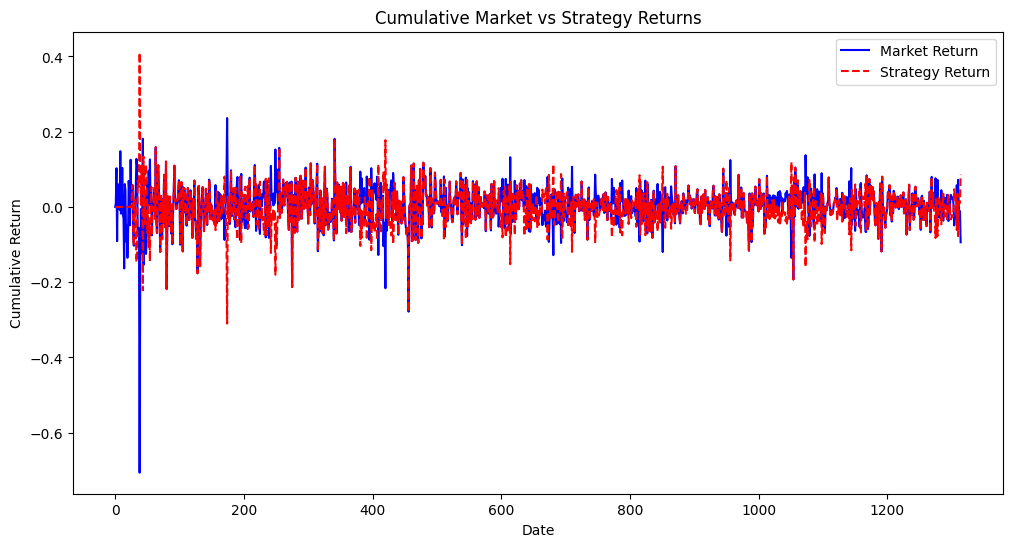

In [27]:
# --- Plot risultati strategia ---
plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative Market Return'], label="Market Return", color='blue')
plt.plot(df['Cumulative Strategy Return'], label="Strategy Return", color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Market vs Strategy Returns")
plt.legend()
plt.show()

In [12]:
import pandas as pd
import numpy as np

# Carica il dataset assicurandoti di interpretare la colonna date come datetime
tickers_input = "AAPL"
file_path = f"/Users/simonebucciol/Desktop/project/csv/{tickers_input}_with_indicators.csv"

# Verifica se il file contiene una colonna "date"
df = pd.read_csv(file_path)

# Controlliamo i nomi delle colonne per assicurarci che "date" esista
print("Column names in dataset:", df.columns)

# Se "date" non è presente, proviamo a identificare il nome corretto
date_col_candidates = [col for col in df.columns if "date" in col.lower()]
if date_col_candidates:
    df.rename(columns={date_col_candidates[0]: "date"}, inplace=True)  # Rinomina la colonna trovata
else:
    raise KeyError("Nessuna colonna contenente 'date' trovata nel file CSV!")

# Converti la colonna in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtra i dati a partire dal 01-01-2000
df = df[df['date'] >= '2000-01-01'].reset_index(drop=True)

# Verifica la corretta conversione
print(df.head())
print(df.dtypes)



Column names in dataset: Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adl', 'atr',
       'middle_band_bll', 'upper_band_bll', 'lower_band_bll', 'cmf', 'co',
       'cmo', 'cci', 'dpo', '+di', '-di', 'dx', 'adx', 'adxr', 'dema', 'emv',
       'emv_ma', 'upper_band_env', 'lower_band_env', 'rl_0.0', 'rl_23.6',
       'rl_38.2', 'rl_50.0', 'rl_61.8', 'rl_100.0', 'fosc', 'tenkan_sen',
       'kijun_sen', 'senkou_a', 'senkou_b', 'imi', 'ko', 'lri', 'lrs', 'mfi',
       'mi', 'mp', 'mom', 'ma-simple', 'ma-exponential', 'ma-time_series',
       'ma-triangular', 'ma-variable', 'macd', 'signal_line', 'nvi', 'obv',
       'sar', 'prf', 'target_LONG', 'pvi', 'pvt', 'highest_high', 'lowest_low',
       'posc', 'prc', 'upper_band', 'lower_band', 'posc.1', 'trigger_line',
       'qstick', 'ri', 'rmi', 'rsi', 'rvi', 'sd', 'smi', '%K', '%D', '%K.1',
       '%D.1', 'swi', 'tsf', 'tema', 'tp', 'uosc', 'vhf', 'vch', 'vosc', 'vrc',
       'wc', 'ws', 'wad', 'wr'],
      dtype='object')
      